In [2]:
print(datetime.datetime.now())
print(f'\n')

2018-01-11 21:07:41.854317


In [1]:
# encoding:utf-8
# 改名客户统计

import re
from imp4nb import *

cnx = lite.connect('data\\quandan.db')
df = pd.read_excel('data\\系统表.xlsx', sheetname='客户档案')
# df.info()

dfccw = df.duplicated('往来单位编号')

for i in list(dfccw[dfccw == True].index):
    wldwmz = (df[df.往来单位编号 == df.loc[i,'往来单位编号']])[['往来单位编号','往来单位']].values
    print(str(i)+'-'+str(len(wldwmz)),end='\t')
    # dfww = pd.read_sql_query('select 单位全名 from xiaoshoumingxi where 单位全名 =\'%s\'' % dfcc.loc[wldwcm[i]]['往来单位'],cnx)
    # print(dfww)



# writer = pd.ExcelWriter('data\\结果输出.xlsx')
# dfcc.to_excel(writer,sheet_name='客户档案',freeze_panes={1,2})
# writer.save()
# 
# writer.close()

35-2	36-3	37-3	56-2	59-2	62-2	88-2	96-2	99-2	108-2	113-2	118-2	128-2	141-2	169-2	205-2	210-2	220-2	260-2	263-2	330-2	404-2	418-2	439-2	456-2	462-2	465-2	502-2	537-2	552-2	563-2	577-2	591-2	603-2	632-2	676-2	715-2	732-2	736-2	757-2	801-2	816-2	817-3	818-3	828-2	848-2	870-2	886-2	900-2	913-2	918-2	922-2	943-2	1005-2	1011-2	1020-2	1025-2	1045-2	1048-2	1071-2	1079-2	1084-2	1090-2	1096-2	1102-2	1109-2	1129-2	1155-2	1157-2	1176-2	1182-2	1219-2	1220-2	1223-2	1231-2	1237-3	1239-2	1241-2	1244-2	1245-2	1247-2	1253-2	1268-2	1280-2	1296-2	1305-2	1308-2	1312-2	1320-2	1338-2	1349-3	1353-2	1364-2	1370-2	1373-3	1377-3	1378-3	1396-2	1401-2	1408-2	1422-2	1427-2	1434-2	1460-2	1509-2	1539-2	1542-2	1545-2	1549-2	

1580-2	1584-2	1588-2	1602-2	1606-2	1611-2	1616-2	1648-2	1720-2	1727-2	1740-2	1754-2	1761-2	1768-2	1820-2	1829-2	1843-2	1909-2	1951-2	1977-2	1992-2	2005-2	2007-2	2024-2	2038-2	2049-2	2056-2	2066-3	2068-3	2095-2	2178-2	2221-2	2228-2	2232-2	2242-2	2250-2	2258-3	2262-2	2274-2	2281-2	2297-2	2306-2	2314-3	2316-3	2317-2	2322-3	2333-3	2334-3	2381-2	2388-2	2428-3	2461-2	2464-2	2503-2	2547-2	2568-2	2616-2	2624-2	2632-2	2644-2	2673-2	2679-2	2708-2	2711-2	2715-2	2755-2	2765-2	2771-2	2777-2	2780-2	2794-2	2804-2	2807-2	2879-2	2885-2	2907-2	2921-2	2925-2	2927-2	2931-2	2934-2	2938-2	2941-2	2981-2	3002-2	3024-3	3025-3	3032-2	3038-2	3063-2	3107-2	3121-3	3122-3	3168-2	3174-2	3176-2	3187-2	3208-2	3214-2	3216-2	3219-2	3226-2	3239-2	3246-2	3251-2	3253-3	3254-3	3272-2	3282-2	3294-3	3295-3	3315-2	3317-2	3343-2	3351-2	3357-2	3372-2	3461-2	3463-3	3464-3

	3466-2	3468-2	3474-2	3499-2	3506-2	3525-3	3526-3	3530-2	3556-3	3557-3	3562-3	3565-4	3566-4	3567-3	3581-2	3584-2	3586-2	3616-2	3634-2	3662-2	3668-2	3691-2	3715-2	3732-2	3739-2	3764-2	3775-2	3783-2	3787-2	3792-2	3794-2	3803-3	3826-2	3835-2	3853-2	3856-2	3865-3	3881-2	3900-2	3938-2	3969-2	3971-2	3975-2	3980-2	3989-2	4023-2	4035-2	4039-2	4043-2	4045-2	4047-2	4059-2	4081-3	4097-2	4101-2	4129-2	4141-2	4147-2	4154-2	4157-2	4186-2	4205-2	4229-2	4231-2	4244-2	4264-2	4287-2	4289-2	4306-2	4313-2	4329-2	4362-2	4392-2	4410-2	4411-2	4422-2	4428-2	4437-2	4441-2	4456-2	4470-2	4473-2	4496-2	4498-2	4500-2	4541-3	4542-3	4545-2	4562-2	4570-3	4576-3	4593-2	4610-2	4625-2	4631-2	4632-2	4644-2	4689-2	4702-2	4717-2	4722-2	4731-2	4744-2	4756-2	4776-2	4779-2	4805-2	4813-2	4842-2	4845-2	4882-2	4886-2	4892-3	4893-3	4895-2	4919-2	4964-2	4999-3	5001-2	5006-2	5022-2	

5080-2	5100-2	5109-2	5112-2	5142-2	5160-2	5162-2	5167-2	5172-3	5174-2	5178-2	5182-2	5200-2	5242-2	5251-2	5259-2	5261-2	5278-2	5284-2	5300-2	5320-2	5335-2	5340-3	5343-2	5371-2	5412-2	5430-3	5446-2	5447-2	5455-2	5474-2	5476-2	5478-2	5539-2	5556-2	5558-2	5565-2	5583-2	5594-2	5597-2	5611-2	5630-2	5637-2	5663-3	5696-2	5705-2	5724-2	5738-2	5742-2	5779-2	5858-2	5882-2	5912-2	5914-2	5925-2	5927-2	5953-2	5956-2	5957-2	5959-2	5961-2	5962-2	5969-2	5971-2	5986-3	5987-2	6024-2	6025-2	6051-2	6083-2	6100-2	6105-2	6121-2	6127-2	6135-2	6170-2	6177-2	6189-2	6214-2	6217-3	6224-3	6226-2	6227-2	6229-2	6233-2	6235-3	6242-2	6259-2	6264-2	6281-2	6332-3	6366-2	6380-2	6383-2	6386-3	6404-2	6468-2	6474-2	6478-2	6482-2	6535-2	6553-2	6609-2	6613-2	6616-2	6618-2	6621-2	6657-2	6676-2	6678-2	6705-2	6739-2	6740-3	6753-2	6771-2	6791-3	6792-2	6794-3	6796-2	6797-2	6799-2	6804-2	6805-2	6807-2	6816-2	6818-2	6824-2	6825-2	6826-2	6828-3	6829-2	6830-3	6831-2	6834-2	6835-2

	6836-2	6842-2	6847-2	6848-2	6849-2	6851-2	6861-2	6863-2	6864-2	6865-2	6866-3	6867-4	6870-3	6874-2	6875-2	6876-2	6877-2	6881-3	6882-2	6884-2	6885-2	6887-2	6888-2	6889-2	6890-2	6891-2	6895-2	6896-2	6897-2	6903-2	6905-3	6908-2	6911-2	6912-2	6913-2	6915-2	6916-2	6918-2	6919-2	6920-2	6922-2	6924-2	6925-3	6926-3	6927-2	6928-2	6929-2	6933-2	6934-3	6935-2	6938-2	6939-2	6940-2	6941-2	6944-2	6945-2	6947-3	6950-2	6951-2	6953-2	6954-2	6962-2	6970-2	6971-2	6972-2	6975-2	6977-2	6978-2	6979-2	6981-2	6982-3	6993-2	6994-2	7000-2	

In [3]:
print(datetime.datetime.now())

2018-01-11 23:42:34.586135


In [11]:
# 数据验证周全性

from imp4nb import *

cnx = lite.connect('data\\quandan.db')

dataokay(cnx)

df = pd.read_sql_query('select xiaoshoumingxi.商品全名,xiaoshoumingxi.商品编号,product.* from xiaoshoumingxi left outer join product on '
                       'xiaoshoumingxi.商品全名 = product.商品全名 where product.商品全名 is null',cnx)
df.describe()
print(df)

df = pd.read_sql_query('select xiaoshoumingxi.单位全名,customer.* from xiaoshoumingxi left outer join customer on '
                       'xiaoshoumingxi.单位全名 = customer.往来单位 where customer.往来单位 is null',cnx)
df = df.groupby('单位全名').sum()
df.describe()
print(df)

df = pd.read_sql_query('select * from xiaoshoumingxi',cnx)
df.info()
df.describe()
dfqc = df.drop_duplicates()
dfqc.info()

cnx.close()

文件《系统表.xlsx》已有 23 条记录，看是否最新？		无需更新。
文件《2017年全单统计管理.xlsm》已有 23 条记录，看是否最新？		无需更新。
文件《jiaqi.txt》已有 1 条记录，看是否最新？		无需更新。
Empty DataFrame
Columns: [商品全名, 商品编号, index, 商品全名, 条码, 分析编码, 品牌分类, 品牌名称, 重点品项, 推广等级, 单价]
Index: []
Empty DataFrame
Columns: [index, 往来单位, 往来单位编号, 地址]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453747 entries, 0 to 1453746
Data columns (total 17 columns):
index    1453747 non-null int64
日期       1453747 non-null object
单据编号     1453747 non-null object
单据类型     1424825 non-null object
职员名称     1453747 non-null object
摘要       1423385 non-null object
备注       1123 non-null object
商品备注     1242980 non-null object
商品编号     1453747 non-null object
商品全名     1453747 non-null object
单价       1452337 non-null float64
单位       1452515 non-null object
数量       1453747 non-null float64
金额       1452337 non-null float64
单位全名     1453747 non-null object
仓库全名     1453747 non-null object
部门全名     1453747 non-null object
dtypes: float64(3), int64(1), object(13)
memory usa

In [10]:
# 统计品牌销售
from imp4nb import *

cnx = lite.connect('data\\quandan.db')
df = pd.read_sql_query(
                    "select 日期,xiaoshoumingxi.单位全名 as 客户名称,customer.往来单位编号 as 编号,金额,substr(customer.往来单位编号,1,2) as 区域 ,"
                    "substr(customer.往来单位编号,12,1) as 类型,product.品牌名称  as 品牌 from xiaoshoumingxi,"
                    "customer,product where (customer.往来单位 = xiaoshoumingxi.单位全名) "
                    "and (product.商品全名 = xiaoshoumingxi.商品全名)" , cnx)
# df.index = df['日期']
# df = df[df.区域.isin(('33','34'))]
df['日期'] = pd.to_datetime(df['日期'])
df = df[df.日期 >= pd.to_datetime('2017-12-01')]
df = df.groupby('品牌').sum()
df = df.sort_values('金额',ascending=False)
print(type(df))
print(df.head(10))

cnx.close()

<class 'pandas.core.frame.DataFrame'>
             金额
品牌             
旭东    386385.64
创食人   227782.92
抓鱼的猫   92170.34
麦小呆    45098.25
非凡     32409.20
卫龙     27958.70
渔米之湘   15591.75
爽口佳    14215.25
欢夫     13930.50
新丰园    13293.40


日期      object
销售额    float64
dtype: object
Index(['日期', '销售额'], dtype='object')
float64
<class 'pandas.core.series.Series'>


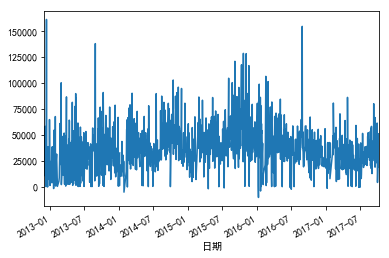

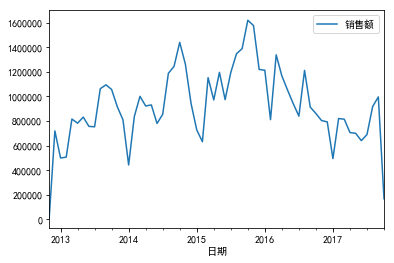

In [22]:
# 

from imp4nb import *

# plot中显示中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

conn = lite.connect('data\\quandan.db')
cursor = conn.cursor()
# df = pd.read_sql('select max(日期) as 日期 from xiaoshoumingxi',conn)
# print(df)
df = pd.read_sql('select 日期,sum(金额) as 销售额 from xiaoshoumingxi group by 日期', conn)
# df = df[df.日期 > '2017-01-01']
df.index = pd.to_datetime(df['日期'])
print(df.dtypes)
print(df.columns)
ds = df['销售额']
print(ds.dtypes)
print(type(ds))
# print(ds)
ds.plot()
df = df.resample('M').sum()
df.plot()
plt.show()
plt.close()

conn.close()

In [ ]:
# 某品牌，随机n家客户
import pandas as pd, sqlite3 as lite, matplotlib.pyplot as plt, numpy as np,calendar
import random as rd
from pylab import *
from tempfile import NamedTemporaryFile

cnx = lite.connect('data\\quandan.db')
# df = pd.read_sql_query(
#                     "select 日期,xiaoshoumingxi.单位全名 as 客户名称,customer.往来单位编号 as 编号,金额,substr(customer.往来单位编号,1,2) as 区域 ,"
#                     "substr(customer.往来单位编号,12,1) as 类型,product.品牌名称  as 品牌 from xiaoshoumingxi,"
#                     "customer,product where (customer.往来单位 = xiaoshoumingxi.单位全名) "
#                     "and (product.商品全名 = xiaoshoumingxi.商品全名)" , cnx)
df = pd.read_sql_query(
                    "select xiaoshoumingxi.单位全名 as 客户名称,customer.往来单位编号 as 编号,customer.地址 as 地址,"
                    "sum(金额) as 销售额,substr(customer.往来单位编号,1,2) as 区域 from xiaoshoumingxi,"
                    "customer,product where (customer.往来单位 = xiaoshoumingxi.单位全名) "
                    "and (product.商品全名 = xiaoshoumingxi.商品全名) "
                    "and (xiaoshoumingxi.商品全名 like \'%鲜果小栈%\')"
                    "group by 编号 order by 编号" , cnx)
# df.index = df['日期']
# df = df[df.区域.isin(('33','34'))]
print(df.shape[0])
df.index = range(len(df))
ls = range(len(df))
randomls = rd.sample(ls, 80)
dfselect = df.loc[randomls, ['编号', '客户名称']]

dfcustomer = pd.read_excel('data\\客户档案20180904.xlsx')
print(dfcustomer.columns)

dffinal = pd.merge(dfselect, dfcustomer, how='inner', left_on='编号', right_on='往来单位编号')

print(dffinal.columns)

dfout = dffinal.loc[:, ['编号', '客户名称', '地址']]

dfout.to_excel('data\\结果输出.xlsx', sheet_name='鲜果小栈客户清单')  

print(dfout)

84


Index(['行号', '选中', '往来单位编号', '往来单位', '助记码', '标记', '地址', '联系电话', '传真', '邮编',
       '联系人', '税号', '银行帐号', '地区', '备注', '停用'],
      dtype='object')
Index(['编号', '客户名称', '行号', '选中', '往来单位编号', '往来单位', '助记码', '标记', '地址', '联系电话',
       '传真', '邮编', '联系人', '税号', '银行帐号', '地区', '备注', '停用'],
      dtype='object')


                 编号                            客户名称  \
0   33200350080SXXD             芙蓉兴盛瑞宇副食  84641692*   
1   01200400000SXXD               八方客茶轩 02765389778   
2   08100450000SXXD                   鑫鑫超市 87864506   
3   34100260050SXXD              响响超市 13517196673 *   
4   01200460000SXXD          便邻超市（八一花园） 02787886026   
5   32400360000SXXD         天富便利店（观澜） 15927456565 *   
6   25101010100S14D          天猫小店喵星人1号店 18627735780   
7   08400600000SXXD                小王超市 18627906788   
8   10200420050SXXD  芙蓉兴盛综合副食店（原天富联投龙湾） 13627298836   
9   01100980200WXXD                驰佳网咖 18986500550   
10  22100530000SXXA           京东便利店双双超市 13554185928   
11  33100800000SXXD             可多（锦绣长江）18271476721   
12  23100860000SXXD            可臣便利店（福星华府） 63375286   
13  26200460000SXXD            可多（楚天医院） 18071036799   
14  25100910000SXXD    Family52便利店（长风路） 13986171246   
15  23400880080S17D          天猫小店喵星人2号店 18627735780   
16  01201620060WXXC                老友网咖 18007137113   
17  341002